# AST 4930 Week 5

## Support vector machines

### Let's load the scikit-learn module and load the Iris dataset.

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

### Let's visualize the data. Petal width vs. Petal length

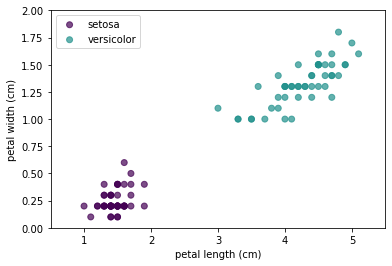

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 0], iris.data[:,3][iris.target == 0], 
                    alpha=0.7, c=iris.target[iris.target == 0], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target ==1], iris.data[:,3][iris.target ==1], 
                        alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

ax.set_xlim(0.5,5.5)
ax.set_ylim(0,2.)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2])

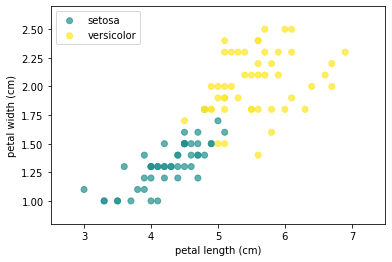

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 1], iris.data[:,3][iris.target == 1], 
                    alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target == 2], iris.data[:,3][iris.target == 2], 
                        alpha=0.7, c=iris.target[iris.target == 2], cmap='viridis', norm=norm)

ax.set_xlim(2.5,7.5)
ax.set_ylim(0.8,2.7)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2], loc='upper left')

In [4]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

X = iris.data[:,2:]
y = (iris.target == 2).astype(np.float64)

# We need feature scaling for SVM.
scaler = StandardScaler()

# Here I'm making three linear SVM Classification models with three different C values.
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)
svm_clf3 = LinearSVC(C=0.1, loss="hinge", random_state=42)

# Making pipelines.
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])
scaled_svm_clf3 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf3),
    ])

# Fit the data.
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)
scaled_svm_clf3.fit(X, y)

/home/jbae/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=0.1, loss='hinge', random_state=42))])

In [5]:
# This cell is only to show the support vectors and margins, so don't worry too much about these.

# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
b3 = svm_clf3.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
w3 = svm_clf3.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf3.intercept_ = np.array([b3])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
svm_clf3.coef_ = np.array([w3])

# Find support vectors (LinearSVC does not do this automatically). 
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
support_vectors_idx3 = (t * (X.dot(w3) + b3) < 1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]
svm_clf3.support_vectors_ = X[support_vectors_idx3]

In [6]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=120, edgecolors='black', facecolors='none', alpha=0.5)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


### Make a plot for the model with C=1

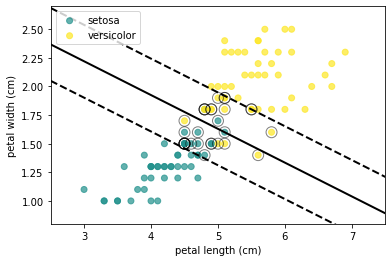

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 1], iris.data[:,3][iris.target == 1], 
                    alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target == 2], iris.data[:,3][iris.target == 2], 
                        alpha=0.7, c=iris.target[iris.target == 2], cmap='viridis', norm=norm)

plot_svc_decision_boundary(svm_clf1, 2.5, 7.5)

ax.set_xlim(2.5,7.5)
ax.set_ylim(0.8,2.7)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2], loc='upper left')

### Make a plot for the model with C=100

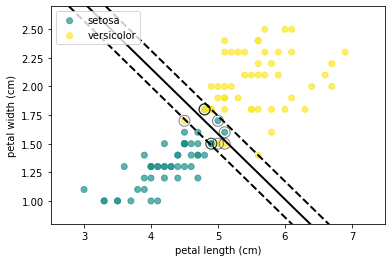

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 1], iris.data[:,3][iris.target == 1], 
                    alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target == 2], iris.data[:,3][iris.target == 2], 
                        alpha=0.7, c=iris.target[iris.target == 2], cmap='viridis', norm=norm)

plot_svc_decision_boundary(svm_clf2, 2.5, 7.5)


ax.set_xlim(2.5,7.5)
ax.set_ylim(0.8,2.7)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2], loc='upper left')

### Make a plot for the model with C=0.01

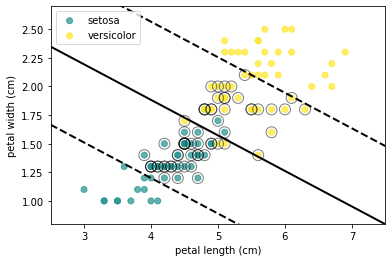

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

setosa = ax.scatter(iris.data[:,2][iris.target == 1], iris.data[:,3][iris.target == 1], 
                    alpha=0.7, c=iris.target[iris.target == 1], cmap='viridis', norm=norm)

versicolor = ax.scatter(iris.data[:,2][iris.target == 2], iris.data[:,3][iris.target == 2], 
                        alpha=0.7, c=iris.target[iris.target == 2], cmap='viridis', norm=norm)

plot_svc_decision_boundary(svm_clf3, 2.5, 7.5)


ax.set_xlim(2.5,7.5)
ax.set_ylim(0.8,2.7)
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.legend([setosa, versicolor], iris.target_names[0:2], loc='upper left')


### Multi-class classification with SVM

In [10]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,2:]
y = iris.target.astype(np.float64)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

model = Pipeline([
    ('sc', StandardScaler()),
    ('svm', SVC(C=1, kernel="linear", decision_function_shape='ovo',random_state=0))
])

model.fit(X, y)

Pipeline(steps=[('sc', StandardScaler()),
                ('svm',
                 SVC(C=1, decision_function_shape='ovo', kernel='linear',
                     random_state=0))])

### Let's compute the decision boundary. See AST4930_W2.ipynb for what is done here about meshgrid.

In [12]:
#Determine the minimum and maximum x & y ranges for the plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print(x_min, x_max, y_min, y_max)

0.0 7.9 -0.9 3.5


In [13]:
#I just wanted to make sure that the values are physical. 
x_min = np.max([x_min, 0.])
y_min = np.max([y_min, 0.])

print(x_min, x_max, y_min, y_max)

0.0 7.9 0.0 3.5


In [14]:
#See https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xpts, ypts = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xpts.ravel(), ypts.ravel()])
Z = Z.reshape(xpts.shape)

Text(0, 0.5, 'petal width (cm)')

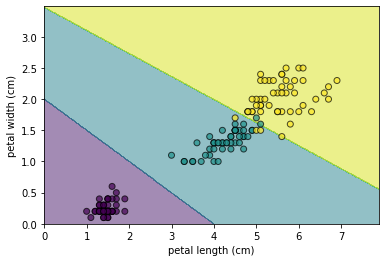

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))

ax.contourf(xpts, ypts, Z, alpha=0.5)

norm = plt.Normalize(vmin=iris.target.min(), vmax=iris.target.max())

#Let's over-plot training/test data points.
plot_train = ax.scatter(X[:,0], X[:,1], alpha=0.7, c=y, cmap='viridis', 
                        norm=norm, edgecolor='black')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

### Looking good!

### Now let's have some fun with mock data.

(-1.4, 1.4)

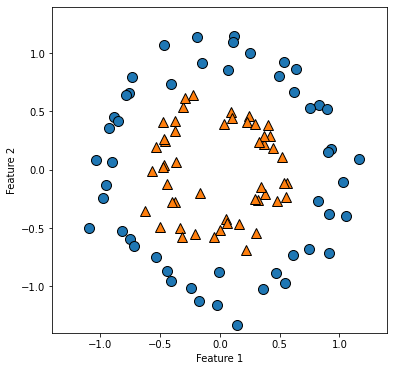

In [16]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

X,y = sklearn.datasets.make_circles(noise=0.1, factor=0.5, random_state=0)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)

### How do the data look when mapped onto a 3D space?

/scratch/local/9303558/ipykernel_10189/1980960274.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-170, azim=-45)


Text(0.5, 0, 'feature1**2 + feature2**2')

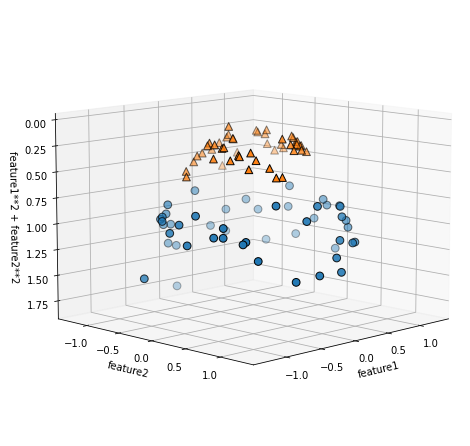

In [17]:
import numpy as np

# add the squared first feature
X_new = np.hstack([X, X[:,0:1]**2 + X[:, 1:2] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure(figsize=(6,6))
# visualize in 3D
ax = Axes3D(figure, elev=-170, azim=-45)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1**2 + feature2**2")


### Adding the hyperplane.

/scratch/local/9303558/ipykernel_10189/2618098932.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-170, azim=-45)


Text(0.5, 0, 'feature1**2 + feature2**2')

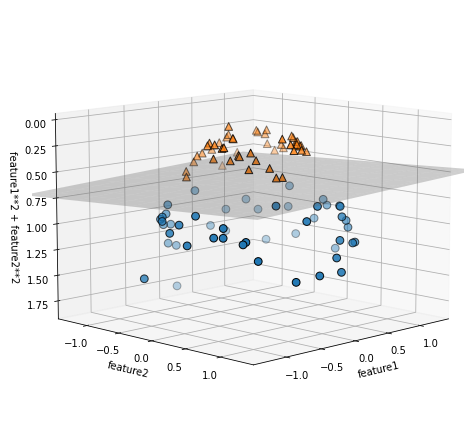

In [18]:
from sklearn.svm import LinearSVC

#Here I'm using a linear version of SVC.
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure(figsize=(6,6))
ax = Axes3D(figure, elev=-170, azim=-45)
xx = np.linspace(X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5, 100)
yy = np.linspace(X_new[:, 1].min() - 0.5, X_new[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3, color='gray')
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)
ax.set_xlabel("feature1")
ax.set_ylabel("feature2")
ax.set_zlabel("feature1**2 + feature2**2")

### This is how the hyperplane looks like in the original 2D space.

(-1.4, 1.4)

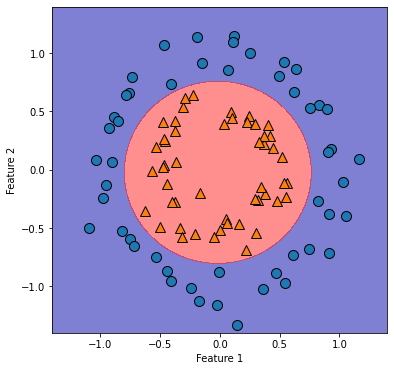

In [19]:
ZZ = XX**2 + YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)

### How do kNN and DT perform on the same problem?

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Here's kNN.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(10)+1,
              'weights': ['uniform','distance']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best model: KNeighborsClassifier(n_neighbors=1)
Test score: 1.00


(-1.4, 1.4)

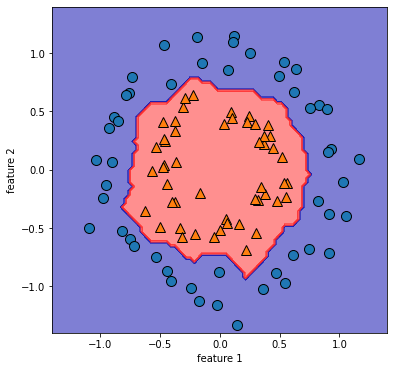

In [22]:
xx = np.linspace(X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5, 100)
yy = np.linspace(X_new[:, 1].min() - 0.5, X_new[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

#This is to make a data structure that is consistent with the training/test datasets.
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)

### Here's DT.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

# By defaults, sklearn's GridSearchCV will use stratified k-fold for classification problems.
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=4)
Test score: 1.00


(-1.4, 1.4)

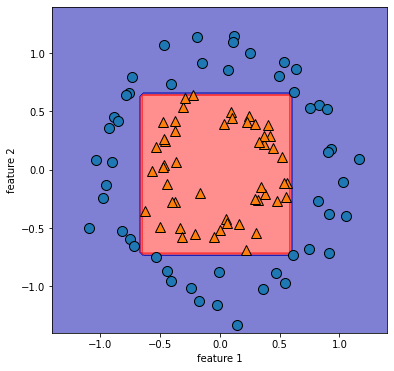

In [24]:
xx = np.linspace(X_new[:, 0].min() - 0.5, X_new[:, 0].max() + 0.5, 100)
yy = np.linspace(X_new[:, 1].min() - 0.5, X_new[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

#This is to make a data structure that is consistent with the training/test datasets.
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_xlim(-1.4,1.4)
ax.set_ylim(-1.4,1.4)

### Let's try SVM on another problem. This time two moons instead of two circles.

Text(0, 0.5, 'Feature 2')

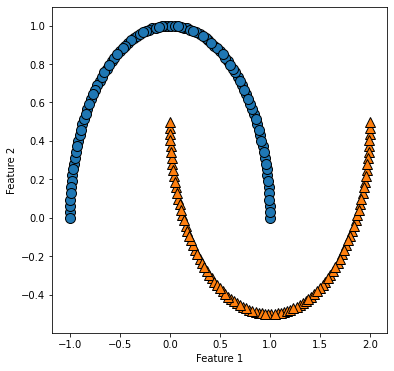

In [25]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

#This is what it looks like without noise.
X,y = sklearn.datasets.make_moons(n_samples=200, noise=0., random_state=0)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

Text(0, 0.5, 'Feature 2')

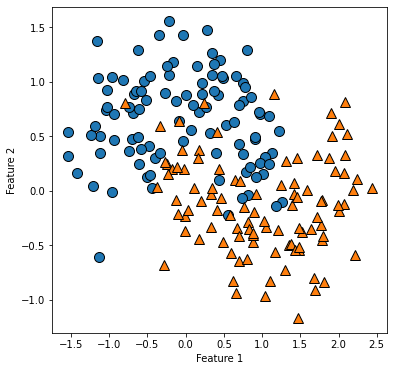

In [26]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

#Now I'm adding some noise.
X,y = sklearn.datasets.make_moons(n_samples=200, noise=0.3, random_state=0)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### Split the data into training and test datasets.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Run GridSearchCV and find the best SVM model. (hint: we will use "rbf" kernel and vary hyperparameter 'C' and 'gamma')

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1., 10., 100.],
              'gamma': [0.01, 0.1, 1., 10., 100.]}

grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'C': 1.0, 'gamma': 1.0}
Best model: SVC(gamma=1.0)
Test score: 0.94


### Let's plot the decision boundary.

Text(0, 0.5, 'feature 2')

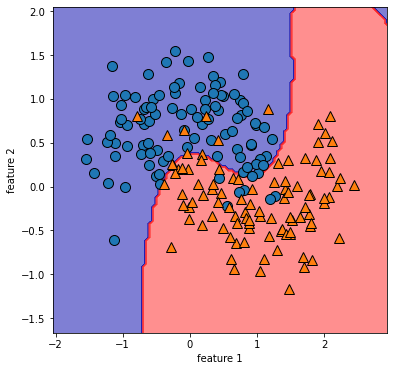

In [29]:
xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

### Let's make a heatmap and see if we are converged with the hyperparameters.

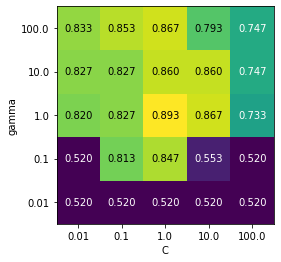

In [30]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(5,5)

mglearn.tools.heatmap(scores, xlabel='C', xticklabels=param_grid['C'],
                     ylabel='gamma', yticklabels=param_grid['gamma'], cmap='viridis', fmt="%.3f")

### What is your best hyperpameters? What is your test score? How does the decision boundary look like?

### How do kNN and DT do on this problem? Choose kNN or DT and complete the cells below.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(30)+1,
              'weights': ['uniform','distance']}

# By defaults, sklearn's GridSearchCV will use stratified k-fold for classification problems.
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'n_neighbors': 18, 'weights': 'distance'}
Best model: KNeighborsClassifier(n_neighbors=18, weights='distance')
Test score: 0.96


### Let's plot the decision boundary.

Text(0, 0.5, 'feature 2')

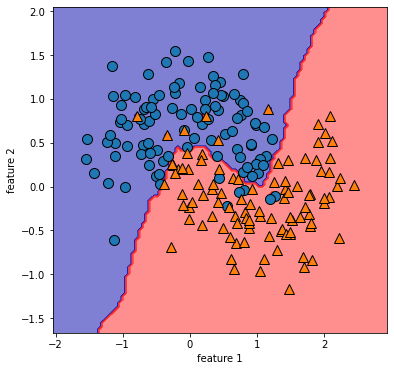

In [32]:
xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

#This is to make a data structure that is consistent with the training/test datasets.
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

### Below is with DT.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(30)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'criterion': 'gini', 'max_depth': 4}
Best model: DecisionTreeClassifier(max_depth=4, random_state=0)
Test score: 0.84


### Let's plot the decision boundary.

Text(0, 0.5, 'feature 2')

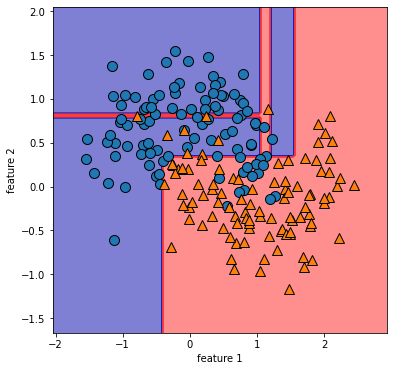

In [34]:
xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5, cmap=mglearn.cm2)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

### We learned that SVM can be relatively slow for a big dataset. Let's see if that's really the case.

### We will use the two moons examples again, varying n_samples = [100, 1000, 10000, 100000]. For each n_samples, measure the time it takes for kNN, DT, and SVM to create models.

In [35]:
import time 

n_samples = [100, 1000, 10000, 100000]

t_kNN_fit = []
t_DT_fit = []
t_SVM_fit = []

t_kNN_pred = []
t_DT_pred = []
t_SVM_pred = []

for i in n_samples:
    X_fit,y_fit = sklearn.datasets.make_moons(n_samples=i, noise=0.3, random_state=0)
    #Note that I used a different random_state.
    X_pred,y_pred = sklearn.datasets.make_moons(n_samples=i, noise=0.3, random_state=1)

    # Fit kNN
    tstart = time.time()
    kNN = KNeighborsClassifier(n_neighbors=18, weights='uniform')
    kNN.fit(X_fit,y_fit)
    t_kNN_fit.append(time.time()-tstart)
       
    # Predict kNN
    tstart = time.time()
    kNN.predict(X_pred)
    t_kNN_pred.append(time.time()-tstart)

    # Run DT
    tstart = time.time()
    DT = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=0)
    DT.fit(X_fit,y_fit)
    t_DT_fit.append(time.time()-tstart)

    # Predict DT    
    tstart = time.time()
    DT.predict(X_pred)
    t_DT_pred.append(time.time()-tstart)

    # Run SVM
    tstart = time.time()
    svm = SVC(kernel="rbf", C=1, gamma=1)
    svm.fit(X_fit,y_fit)
    t_SVM_fit.append(time.time()-tstart)
    
    # Predict SVM
    tstart = time.time()
    svm.predict(X_pred)
    t_SVM_pred.append(time.time()-tstart)


### Make a plot showing running time vs. n_samples for the three algorightms. (hint: use logarithmic scale for both x and y axes.)

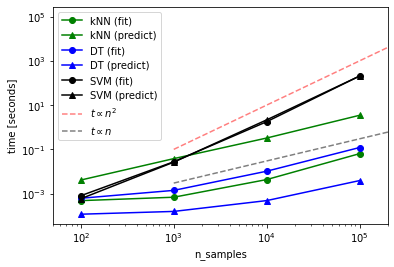

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(n_samples, t_kNN_fit, 'go-', label='kNN (fit)')
ax.plot(n_samples, t_kNN_pred, 'g^-', label='kNN (predict)')

ax.plot(n_samples, t_DT_fit, 'bo-', label='DT (fit)')
ax.plot(n_samples, t_DT_pred, 'b^-', label='DT (predict)')

ax.plot(n_samples, t_SVM_fit, 'ko-', label='SVM (fit)')
ax.plot(n_samples, t_SVM_pred, 'k^-', label='SVM (predict)')

ax.plot([1.0e3,1.0e6],[1.0e-1,1.0e5],'r--', alpha=0.5, label=r'$t \propto n^2$')
ax.plot([1.0e3,1.0e6],[3.0e-3,3.0e0],'k--', alpha=0.5, label=r'$t \propto n$')

ax.set_xlim(5.0e1,2.0e5)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('n_samples')
ax.set_ylabel('time [seconds]')

ax.legend(loc='upper left')

### Let's move on to the next problem.

### Here, we will take advantage of the SVM's capability to solve non-linear problems to classify images. We will use MNIST handwritten digits dataset. http://yann.lecun.com/exdb/mnist/

### Use Tensorflow kernel. 

In [37]:
from tensorflow.keras.datasets import mnist

# Load the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [38]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### As you see, the dataset is pretty big (it has only 70k images, but each of them is 28 x 28 array). We will take 1/50 of the data.

In [39]:
X_train = X_train[::50]
y_train = y_train[::50]
X_test = X_test[::50]
y_test = y_test[::50]

In [41]:
X_train.shape

(1200, 28, 28)

### Let's have a look at what the data look like.

Text(0.5, 1.0, 'The number is = 5')

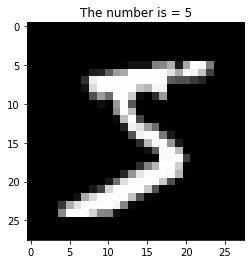

In [42]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.title('The number is = {}'.format(y_train[0]))

### We will "flatten" the data. By flattening, we convert a 2d array with 28x28 elements to an 1d array with 784 elements.

In [43]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [44]:
X_train.shape

(1200, 784)

5


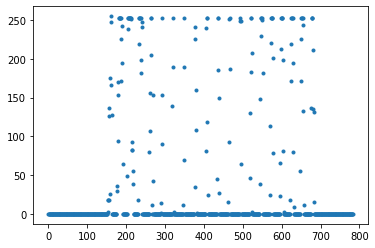

In [45]:
plt.plot(X_train[0],'.')
print(y_train[0])

### Make a SVM model.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Remember that we need feature scaling for SVM.
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('SVM', SVC(kernel='rbf'))
])

# Choose hyperparameters to optimize.
param_grid = {'SVM__C': [0.01, 0.1, 1., 10., 100.],
              'SVM__gamma': [0.01, 0.1, 1., 10., 100.]}

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Test score: 0.57
Best parameters: {'SVM__C': 10.0, 'SVM__gamma': 0.01}
Best model: Pipeline(steps=[('scaler', StandardScaler()), ('SVM', SVC(C=10.0, gamma=0.01))])


### Let's make a heat map.

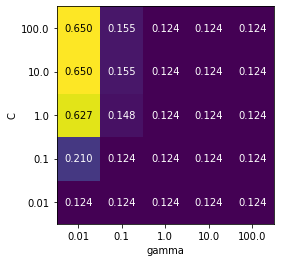

In [47]:
import pandas as pd
import numpy as np
import mglearn

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(len(param_grid['SVM__C']),len(param_grid['SVM__gamma']))

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['SVM__gamma'],
                     ylabel='C', yticklabels=param_grid['SVM__C'], cmap='viridis', fmt="%.3f")

### We can also make a confusion matrix and see where the model does well/bad.

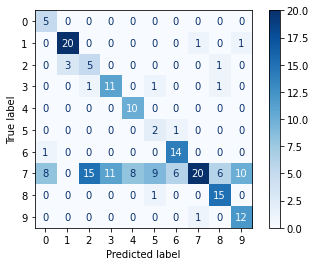

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(grid_search.predict(X_test), y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


### The heatmap indicates that we may need to include smaller gamma values in the parameter optimization.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('SVM', SVC(kernel='rbf'))
])

param_grid = {'SVM__C': [0.1, 1., 10., 100., 1.0e3, 1.0e4],
             'SVM__gamma': [1.0e-4, 1.0e-3, 0.01]}


grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Test score: 0.86
Best parameters: {'SVM__C': 10.0, 'SVM__gamma': 0.001}
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(C=10.0, gamma=0.001))])


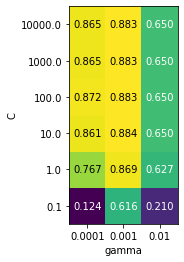

In [51]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(len(param_grid['SVM__C']),len(param_grid['SVM__gamma']))

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['SVM__gamma'],
                     ylabel='C', yticklabels=param_grid['SVM__C'], cmap='viridis', fmt="%.3f")

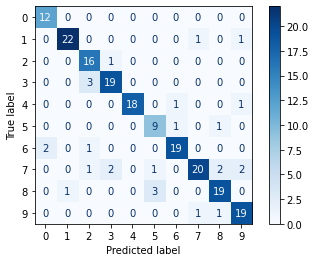

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(grid_search.predict(X_test), y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Let's check some results

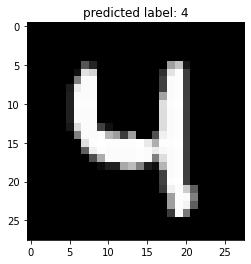

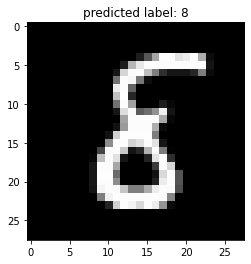

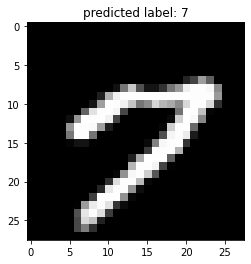

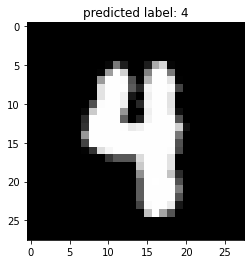

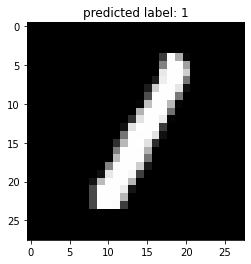

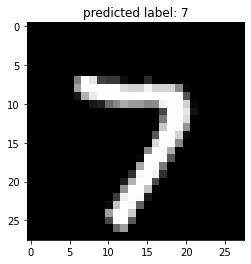

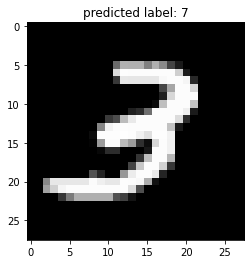

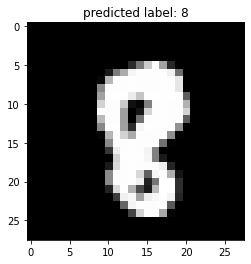

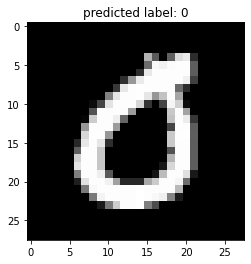

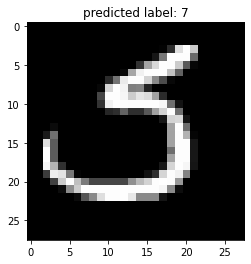

In [53]:
y_predict = grid_search.predict(X_test)

for i in (np.random.randint(0,y_test.shape[0],10)):
    plt.title('predicted label: {0}'. format(y_predict[i]))
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.show()


### We can also check what we did wrong. Make some plots for those we got wrong prediction.

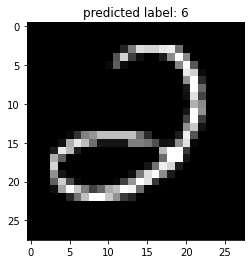

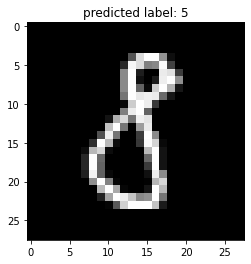

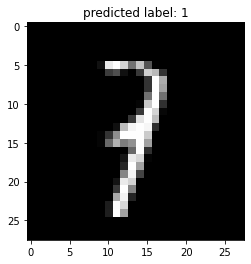

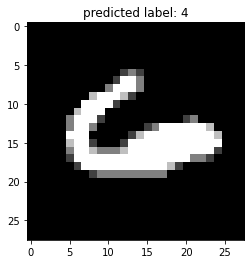

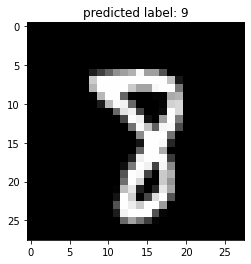

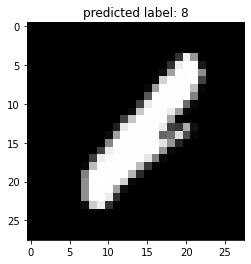

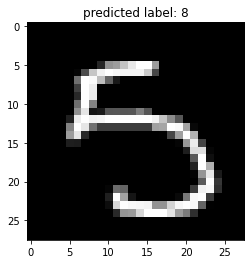

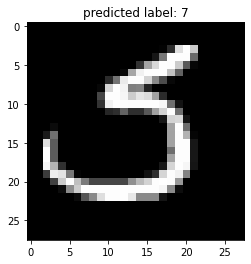

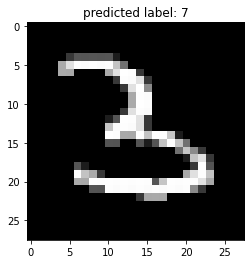

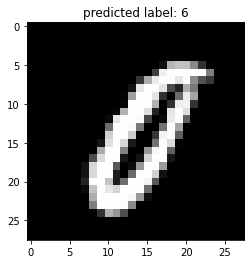

In [54]:
ind_wrong = np.where(y_predict != y_test)[0]
for i in ind_wrong[:10]:
    plt.title('predicted label: {0}'. format(y_predict[i]))
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.show()
    

### We can also try kNN and DT and see how well they perform.

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth': np.arange(10)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Test score: 0.66
Best parameters: {'criterion': 'entropy', 'max_depth': 9}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)


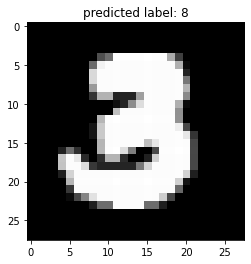

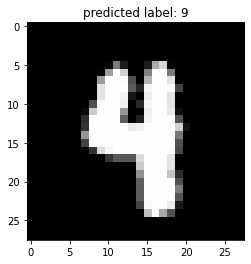

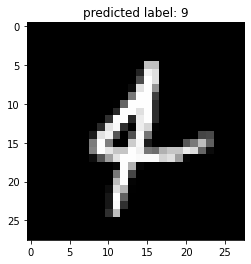

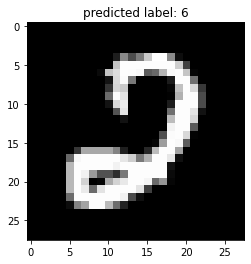

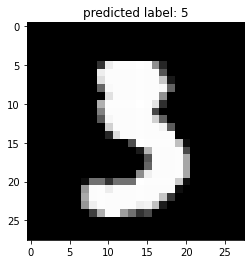

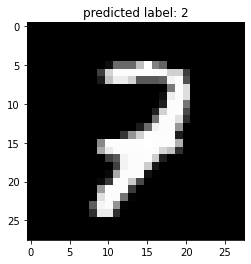

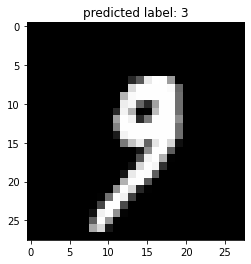

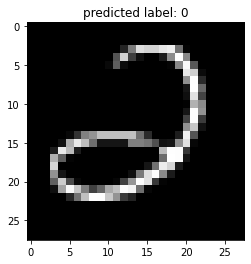

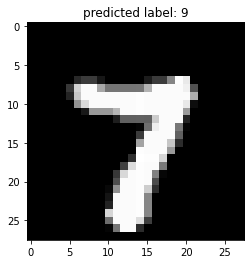

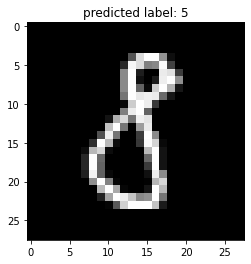

In [56]:
y_predict = grid_search.predict(X_test)

ind_wrong = np.where(y_predict != y_test)[0]
for i in ind_wrong[:10]:
    plt.title('predicted label: {0}'. format(y_predict[i]))
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.show()

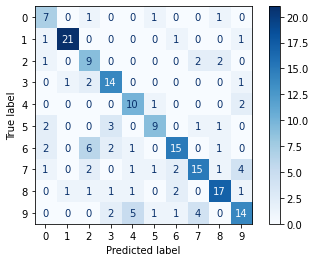

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(grid_search.predict(X_test), y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Here's kNN.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(15)+1,
              'weights': ['uniform','distance']}

# By defaults, sklearn's GridSearchCV will use stratified k-fold for classification problems.
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True, 
                           verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'n_neighbors': 4, 'weights': 'distance'}
Best model: KNeighborsClassifier(n_neighbors=4, weights='distance')
Test score: 0.87


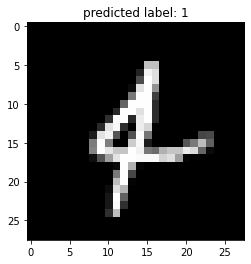

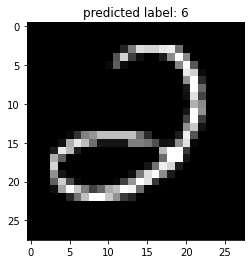

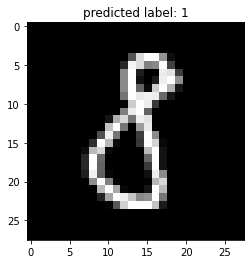

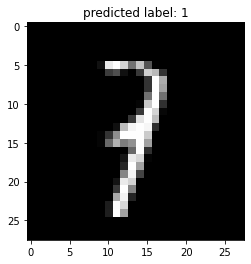

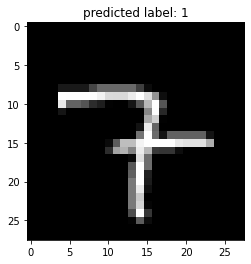

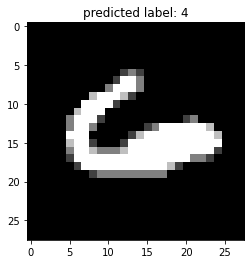

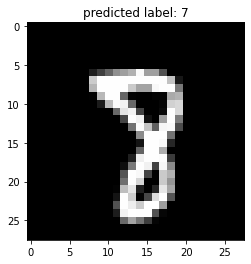

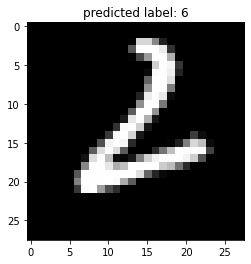

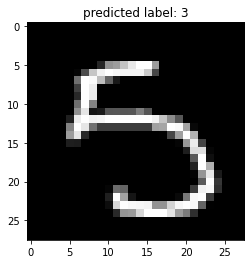

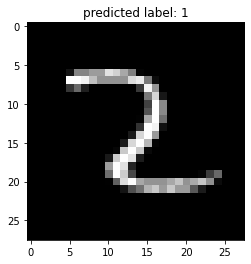

In [59]:
y_predict = grid_search.predict(X_test)

ind_wrong = np.where(y_predict != y_test)[0]
for i in ind_wrong[:10]:
    plt.title('predicted label: {0}'. format(y_predict[i]))
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.show()

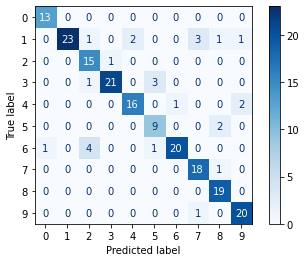

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(grid_search.predict(X_test), y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Regression with SVM

### Here's an example of linear SVR.

In [61]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [62]:
from sklearn.svm import LinearSVR

# I'm making two linear SVR models, one with epsilon=1.5 and the other with epsilon=0.5.
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# Don't worry too much about the lines below. This is just to visualize the support vectors.
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

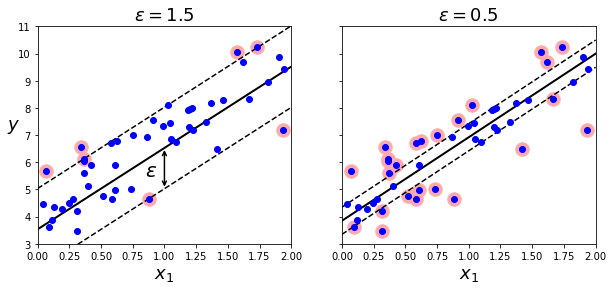

In [63]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.85, 5.5, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)


### And here's an example of non-linear SVR

In [64]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

In [65]:
from sklearn.svm import SVR

# I'm making two SVR models, one with third-degree polynomial and the other with Gaussian RBF.

svm_poly = SVR(kernel="poly", degree=3, C=100, epsilon=0.1, coef0=1.)
svm_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm_poly.fit(X, y)
svm_rbf.fit(X, y)

SVR(C=100, gamma=0.1)

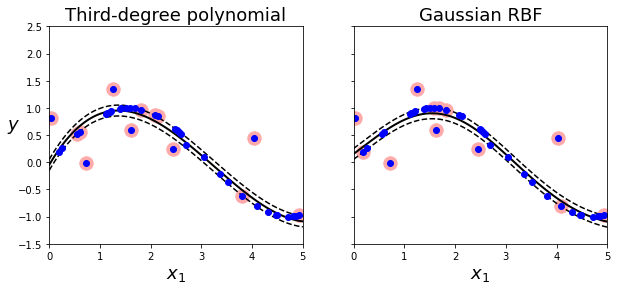

In [66]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_poly, X, y, [0, 5, -1.5, 2.5])

plt.title("Third-degree polynomial", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_rbf, X, y, [0, 5, -1.5, 2.5])

plt.title("Gaussian RBF", fontsize=18)
